# PREDIRE LE PRIX D'UN BIEN IMMOBILIER
# Mohamed Amine MILADI 

# PLAN
## 1-INTRODUCTION
## 2-IMPORTATIONS
### 2.1-Importer les bibliothèques
### 2.2-Importer notre base de données
## 3-EXPLICATION DE LA BASE DE DONEES
### 3.1-À propos de ce fichier
### 3.2-Variable cible
### 3.3-Remarque
## 4-DIVISER LES DONNEES
### 4.1-Données d'entrainement
### 4.2-Données de test
### 4.3-Poucentage
## 5-VISUALISATION DES DONNEES
### 5.1-Histogrammes des caractéristique
### 5.2-corrélation entre les caractéristique
### 5.3-Afficher cette corrélation en plus clair
## 6-OPTIMISATION DES DONNEES
### 6.1-Transformer "ocean_proximity" pour mieux l'exploiter
###### 6.1.1-"Dropper" la colonne "ocean_proximity"
###### 6.1.2-Examiner la corrélation entre ces nouvelles valeurs binaires
###### 6.1.3-Observation et Hypothèse
### 6.2-illustrer cette hypothèse à l'aide d'un graphique
###### 6.2.1-Traçage du graphique
###### 6.2.2-Analyse du graphiquE
### 6.3-Création deux nouvelles caractéristiques plus utiles
###### 6.3.1-'bedroom_ratio'
###### 6.3.2-'household_rooms'
###### 6.3.3-Préparation des caractéristiques que nous avons ajouté
## 7-CREATION D'UN MODELE DE MACHINE LEARNING
### 7.1-Modèle de régression linéaire
###### 7.1.1-ENTRAINEMENT modele de regression lineaire
###### 7.1.2-SCORE modele de regression lineaire
### 7.2-Modèle : Random Forest Regressor
###### 7.2.1-ENTRAINEMENT RandomForestRegressor
###### 7.2.2-SCORE RandomForestRegressor
## 8-PREDICTION MANUELLE
## 9-CONCLUSION
## 10-SOURCES

# 1-INTRODUCTION

Dans ce projet nous allons mettre en place un modèle de Machine Learning dont la tâche est de prédire le prix d'un bien immobilier (maison,appartement)<br><br>
Pour effectuer un tel travail de Machine Learning nous devons commencer par comprendre et analyser nos données afin de les exploitées de la meilleur manière et en tirer le modèle le plus optimale à la prédiction.

# 2-IMPORTATIONS:

### 2.1-Importer les bibliothèques
Commençons d'abord par importer les bibliothèques nécessaires à ce projet

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2-Importer notre base de données

In [98]:
data = pd. read_csv ("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# 3-EXPLICATION DE LA BASE DE DONNEES :
### 3.1-À propos de ce fichier
Les données contiennent des informations provenant du recensement californien de 1990.
###### voici la définition de chaque caractéristique:<br>

1. longitude : mesure de la distance à l'ouest d'une maison ; une valeur plus élevée est plus à l'ouest

2. latitude : mesure de la distance au nord d'une maison ; une valeur plus élevée est plus au nord

3. housing_Median_Age : âge médian d'une maison dans un bien ; un nombre inférieur est un bâtiment plus récent

4. total_Rooms : nombre total de chambres dans un bien

5. total_Bedrooms : nombre total de chambres à chouher dans un bien

6. population : nombre total de personnes résidant dans un bien

7. households : nombre total de ménages, un groupe de personnes résidant dans une unité d'habitation, pour un bien

8. median_Income : revenu médian des ménages dans un bien de maisons (mesuré en dizaines de milliers de dollars américains)

9. median_House_Value : Valeur médiane des maisons pour les ménages d'un bien (mesurée en dollars américains)

10. ocean_Proximity : Emplacement de la maison par rapport à l'océan/la mer

### 3.2-variable cible:
notre viriable cible est "median_house_value" on cherche à predir ça valeur

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### 3.3-Remarque:
20640 - 20433 = 207 valeurs manquent pour la variable "total_bedrooms" (il y a 20433 valeurs parmis 20640) donc je vais utiliser uniquement les 20433 lignes qui n'ont pas de valeurs Null
<br><br>
Alors je vais "Dropper" ces 207 ligne qui contiennent une valeur null

In [100]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


### Voilà maintenant notre DataFrame ne contient plus de valeurs Null

# 4-DIVISER LES DONNEES :

on va diviser les données en données d'entraînement et de test et nous allons les diviser en données X et Y c'est très
important parce que nous voulons former notre modèle sur un ensemble de données pour ensuite l'évaluer
sur un autre ensemble donc nous n'allons pas travailler avec toutes les données parce que nous avons besoin d'avoir des données invisibles que le modèle n'a jamais vu auparavant pour voir s'il fonctionne bien sur ces données dont nous avons les valeurs de la variable cible "median_house_value" 

### 4.1-données d'entraînement: 
X sera en fait le bloc de données sans les variables cibles, donc nous allons "Dropper" la variable cible qui est "median_house_value"<br>
### 4.2-données de test: 
Y va être la colonne "median_house_value"

In [101]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [102]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [103]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

### 4.3-Pourcentage:
##### 80% pour l'entrainement et 20% pour le test
On va maintenant spécifiez combien de pourcentage des données nous souhaitons utiliser pour tester, ici ça sera 0,2 donc 20%
des données seront réservées à l'évaluation et nous n'allons pas toucher à ces données 

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Ce que nous voulons faire maintenant est réunir à nouveau les données d'entraînement X_train et y_train afin que nous puissions analyser peut-être certaines corrélations de base

In [105]:
train_data=X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12124,-117.24,33.94,15.0,1569.0,423.0,1123.0,369.0,1.6111,INLAND,113900.0
15003,-117.04,32.75,36.0,2297.0,418.0,1070.0,392.0,3.5192,NEAR OCEAN,144000.0
15865,-122.40,37.76,52.0,1185.0,246.0,480.0,253.0,4.4074,NEAR BAY,277300.0
11681,-118.00,33.84,29.0,2641.0,637.0,2413.0,619.0,2.8169,<1H OCEAN,165100.0
15790,-122.40,37.77,52.0,144.0,63.0,1061.0,68.0,4.3958,NEAR BAY,225000.0
...,...,...,...,...,...,...,...,...,...,...
9582,-120.49,37.32,10.0,1275.0,255.0,620.0,240.0,3.0263,INLAND,118300.0
16998,-122.27,37.54,16.0,3913.0,565.0,1752.0,557.0,7.3644,NEAR BAY,419700.0
18849,-122.39,41.41,23.0,910.0,199.0,370.0,169.0,1.7448,INLAND,80100.0
6673,-118.11,34.15,26.0,2193.0,558.0,1186.0,559.0,3.6474,<1H OCEAN,184100.0


# 5-VISUALISATION DES DONNEES:
### 5.1-Histogrammes des caractéristiques:
nous pouvons obtenir les histogrammes pour les distributions des caractéristiques individuelles<br>
voilà donc vous pouvez voir ici la répartition des différentes caractéristiques

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

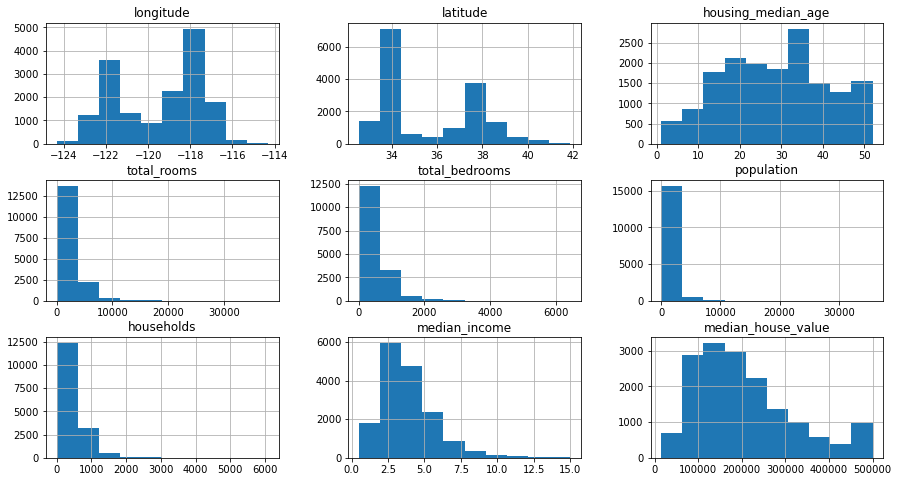

In [106]:
train_data.hist(figsize=(15,8))

### 5.2-Correlation entre les caractéristiques:
Le plus intéressant est la corrélation avec notre variable cible "median_house_value"

In [107]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924223,-0.104095,0.040477,0.065536,0.097554,0.052835,-0.023769,-0.053014
latitude,-0.924223,1.000000,0.006600,-0.032364,-0.063897,-0.106692,-0.069166,-0.071830,-0.137269
housing_median_age,-0.104095,0.006600,1.000000,-0.360087,-0.320264,-0.292907,-0.302679,-0.123757,0.102537
total_rooms,0.040477,-0.032364,-0.360087,1.000000,0.929049,0.854024,0.917683,0.205764,0.138826
total_bedrooms,0.065536,-0.063897,-0.320264,0.929049,1.000000,0.874676,0.979242,-0.002633,0.052854
population,0.097554,-0.106692,-0.292907,0.854024,0.874676,1.000000,0.904773,0.008114,-0.023301
households,0.052835,-0.069166,-0.302679,0.917683,0.979242,0.904773,1.000000,0.019763,0.068540
median_income,-0.023769,-0.071830,-0.123757,0.205764,-0.002633,0.008114,0.019763,1.000000,0.692000
median_house_value,-0.053014,-0.137269,0.102537,0.138826,0.052854,-0.023301,0.068540,0.692000,1.000000


### 5.3-Afficher cette corrélation en plus clair: 
via une matrice thermique afin que nous puissions voir les nombres de corrélation réels, nous allons dire que la carte des couleurs va être jaune vert bleu

<AxesSubplot:>

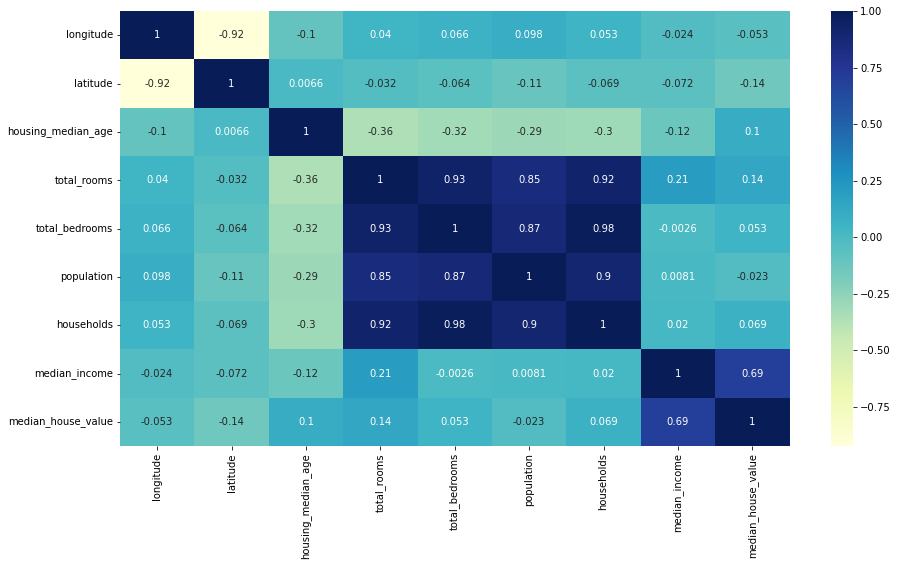

In [108]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

On peut voir que le revenu médian des ménages "median_income" est fortement corrélé (0.69) avec la valeur médiane de la maison "median_house_value"<br><br> 
il s'agit donc d'une variable très intéressante à examiner et peut être un excellent prédicteur de la valeur de la maison<br><br>
puis on peut voir que, par exemple, la latitude est corrélée négativement (-0.14)
avec la valeur de la maison donc c'est une caractéristique importante


Nous allons prendre le logarithme de ces caractéristiques pour qu'elles soit mieux distribuées<br>
Ceci ne change en aucun cas leurs corrélations

In [109]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data[ 'households'] + 1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

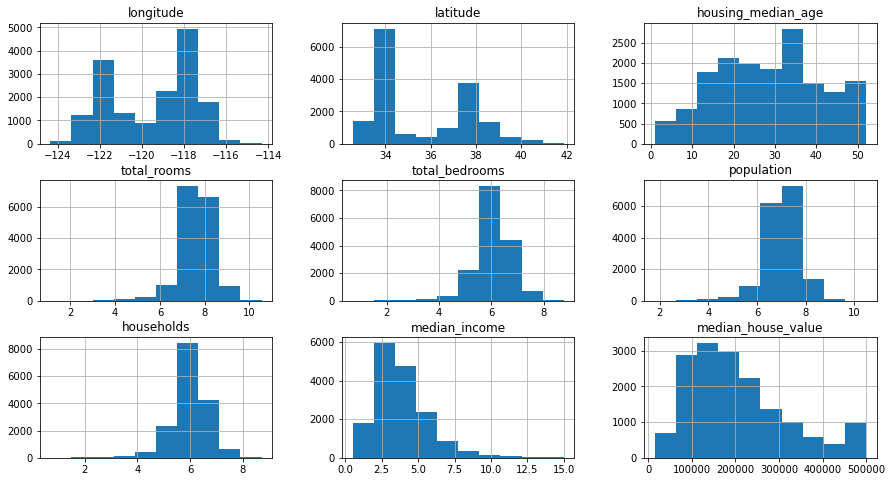

In [110]:
train_data.hist(figsize=(15,8))

Et maintenant on peut voir que nous avons quelque chose qui ressemble plus à une cloche gaussienne ici<br>
Donc la distribution normale semble être le cas pour ces quatre caractéristiques

# 6-OPTIMISATION DES DONNEES:
### 6.1-Transformer "ocean_proximity" pour mieux l'exploiter:
On va maintenant transformer les valeur de la colonne "ocean_proximity" en caractéristiques binaires qui peuvent être 0 ou 1:

In [111]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7261
INLAND        5166
NEAR OCEAN    2100
NEAR BAY      1815
ISLAND           4
Name: ocean_proximity, dtype: int64

In [112]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12124,0,1,0,0,0
15003,0,0,0,0,1
15865,0,0,0,1,0
11681,1,0,0,0,0
15790,0,0,0,1,0
...,...,...,...,...,...
9582,0,1,0,0,0
16998,0,0,0,1,0
18849,0,1,0,0,0
6673,1,0,0,0,0


### 6.1.1-"Dropper" la colonne "ocean_proximity":
Après cette transformation on va joindre ce DataFrame à "train_data" et "Dropper" la colonne "ocean_proximity" ainsde cette manière :

In [113]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [114]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12124,-117.24,33.94,15.0,7.358831,6.049733,7.024649,5.913503,1.6111,113900.0,0,1,0,0,0
15003,-117.04,32.75,36.0,7.739794,6.037871,6.976348,5.973810,3.5192,144000.0,0,0,0,0,1
15865,-122.40,37.76,52.0,7.078342,5.509388,6.175867,5.537334,4.4074,277300.0,0,0,0,1,0
11681,-118.00,33.84,29.0,7.879291,6.458338,7.789040,6.429719,2.8169,165100.0,1,0,0,0,0
15790,-122.40,37.77,52.0,4.976734,4.158883,6.967909,4.234107,4.3958,225000.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9582,-120.49,37.32,10.0,7.151485,5.545177,6.431331,5.484797,3.0263,118300.0,0,1,0,0,0
16998,-122.27,37.54,16.0,8.272315,6.338594,7.469084,6.324359,7.3644,419700.0,0,0,0,1,0
18849,-122.39,41.41,23.0,6.814543,5.298317,5.916202,5.135798,1.7448,80100.0,0,1,0,0,0
6673,-118.11,34.15,26.0,7.693482,6.326149,7.079184,6.327937,3.6474,184100.0,1,0,0,0,0


### 6.1.2-Examiner la corrélation entre ces nouvelles valeurs binaires:
Recommencons pour voir comment ces nouvelles caractéristiques sont corrélées avec notre variable cible "median_house_value"

<AxesSubplot:>

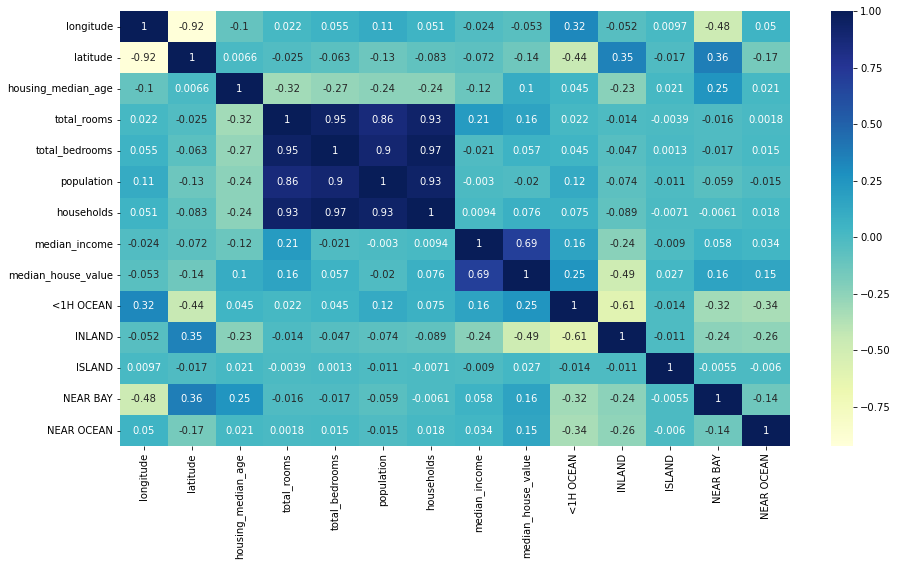

In [115]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

### 6.1.3-Observation et Hypothèse:
on peu observer ici que nous avons une forte corrélation négative avec "Inland" (-0.49) donc on peut faire l'hypothèse que le prix de notre bien dépent en gande partie de sa proximité à la plage.<br><br>

## 6.2-illustrer cette hypothèse à l'aide d'un graphique:
### 6.2.1-Traçage du graphique:

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

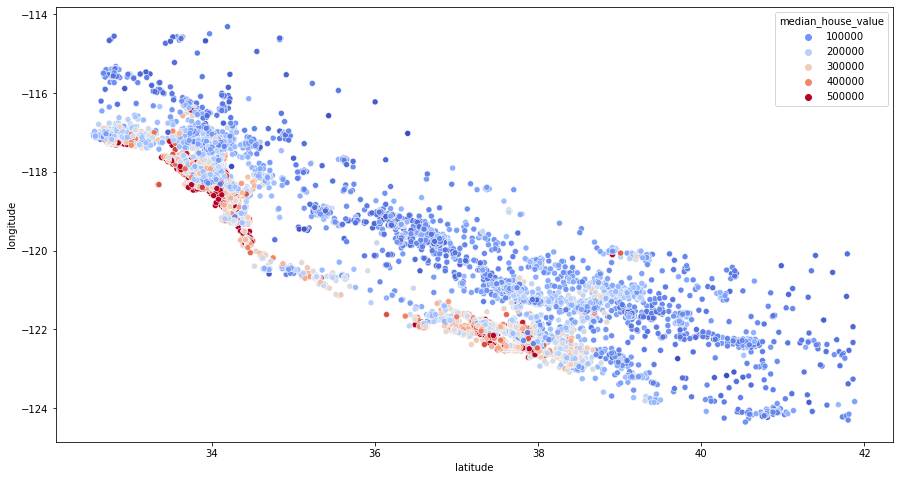

In [116]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

### 6.2.2-Analyse du graphique:
#### Ce que nous voyons si dessus est la valeur médiane des maisons en fonction de leurs positions

#### On peut voir ici même si ce n'est pas une carte de la Californie:

#### En bas à gauche : (points rouges)
c'est donc la côte (la plage) où les maisons sont plus chères

#### En haut à droite: (points bleus)
c'est donc l'intérieur des terres où les maisons sont moins chères

## 6.3-Création deux nouvelles caractéristiques plus utiles:


### 6.3.1-'bedroom_ratio':
Nous avons un total de chambres ici par bien mais ce qui pourrait être encore plus intéressant c'est le nombre de chambres à coucher parmis ces chambres
Donc ce que nous voulons faire, c'est savoir le nombre de chambres à coucher parmis ces chambres
### 6.3.2-'household_rooms':
Nous avons un nombre total de chambres, mais si vous avez un bien avec plus de ménages que d'habitude, nous aurions probablement aussi plus de chambres, de sorte que les chambres en elles-mêmes ne nous donnent pas nécessairement une image complète.<br>
Donc ce que nous voulons faire, c'est savoir combien de pièces par ménage

## Voici la création de ces deux caractéristiques:

In [117]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<AxesSubplot:>

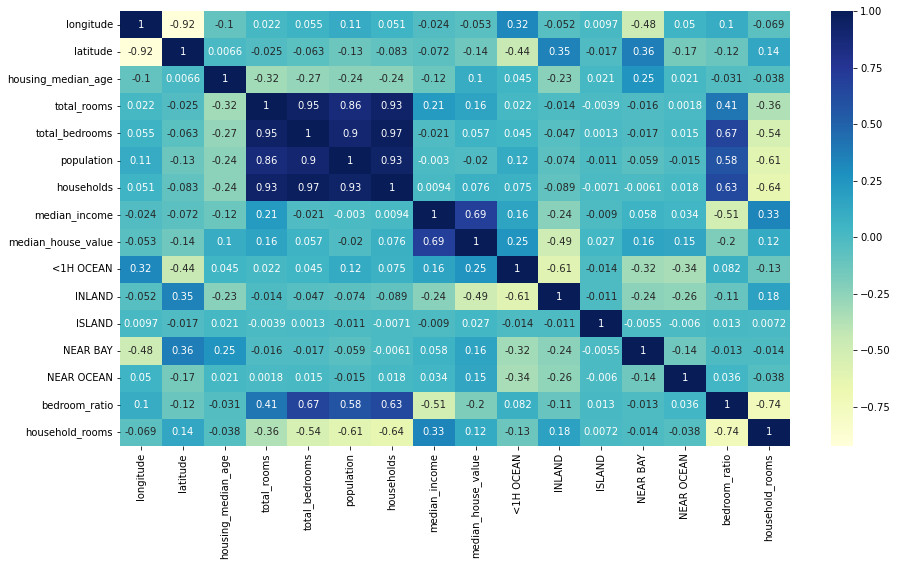

In [118]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

Nous pouvons regarder si dessus que notre variable cible 'median_house_value' a une corrélation significative avec nos nouvelles caractéristiques<br>

##### bedroom_ratio:

On voit aussi que "total_rooms" sont intéressantes mais les chambres à coucher 'toal_bedrooms' ne sont pas intéressantes<br>

Alors que le ratio de chambres "bedroom_ratio" corrélé négativement (-0.2) avec "median_house_value" est assez intéressant<br>

##### household_rooms:

On peut voir que les ménages "households" en eux-mêmes ne sont pas très intéressant comme variables d'entrée ils ont une corrélation de 0,07 avec notre Variable cible "median_house_value"<br>

Alors que "household_rooms" est plus intéressante avec une corrélation plus importante de 0.12<br>

## Nous avons donc conçu deux caractéristiques qui semblent être intéressantes et importantes pour la prédiction

### 6.3.3-Préparation des caractéristiques que nous avons ajouté

In [119]:
#on refait les la même chose mais cette fois pour les données à tester par le modele

test_data = X_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies (test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data[ 'household_rooms'] = test_data['total_rooms'] / test_data[ 'households']

# 7-CREATION D'UN MODELE DE MACHINE LEARNING:
## 7.1-Modèle de régression linéaire
Nous allons commencer par le modèle le plus simple qui est le modèle de régression linéaire

#### 7.1.1-ENTRAINEMENT modèle de regression lineaire :
on va entrainer notre modele de regression lineaire avec les train_data

In [120]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

on va redefinir les données à tester par notre modele, les test_data

In [121]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

#### 7.1.2-SCORE modèle de regression lineaire :

In [122]:
reg.score(X_test,y_test)

0.6568439389311419

le score obtenu si dessus (~65%) est celui du modele de regression lineaire ce n'est pas un score elevé<br>
on va voir qu'on peut faire mieux avec d'autre type de modèle

## 7.2-Modèle : Random Forest Regressor
#### Passons mainteneant au Random Forest Regressor ce sera un modèle plus puissant :

#### 7.2.1-ENTRAINEMENT RandomForestRegressor :
on va entrainer notre modèle RandomForestRegressor avec les train_data

In [123]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

#### 7.2.2-SCORE RandomForestRegressor :

In [124]:
forest.score(X_test, y_test)

0.8115722274095282

On peut voir que le score de ce modele (~81%) est bien meilleur que le modele precedent

# 8-PREDICTION MANUELLE:
On peut faire cette prédiction manuellement de la manière suivante:

In [125]:
predict=forest.predict(X_test)
predict

array([154905.  ,  96213.  , 160005.  , ..., 169430.  , 277236.04,
       185913.  ])

In [126]:
type(predict)

numpy.ndarray

In [127]:
prediction=pd.DataFrame(predict, columns= ['Predicted y'])
prediction

,Predicted y
0,154905.00
1,96213.00
2,160005.00
3,229994.00
4,206240.00
...,...
4082,93028.00
4083,206979.00
4084,169430.00
4085,277236.04


In [128]:
y_test

4175     148200.0
18974     87500.0
7413     151600.0
11565    210600.0
11676    197200.0
           ...   
13697     82500.0
15398    294600.0
6925     176800.0
18922    219700.0
6476     207200.0
Name: median_house_value, Length: 4087, dtype: float64

### En comparant à vue d'œil les valeurs de "y_test" et les valeurs prédites "Predicted y" on remarque qu'ils sont assées proches les unes des autres 
Donc on peut alors considérer que notre modèle de Machine Learning est fiable

# 9-CONCLUSION
Nous venons de voir à travers ce projet qu'il est rès important de travailler, analyser, transformer ses données avant de commencer à les exploitées.<br><br>

En effet l'appretissage supervisé necessite une rigueur au niveau de l'utilistion de ses données, on doit alors optimiser cette exploitation au mieux en comprenant leur sen et leur influence sur notre variable cible.<br><br>

Nous avons vu deux modèles différent au cours de ce travaille.<br><br>

On a pu remarquer dans notre cas que le Random Forest Regressor était plus fiable que le modèle de Regression Linéaire.<br><br>

Donc avant d'opter pour un Modèle de Machine Learning il faut en tester plusieurs et comparer leurs scores pour choisir le meilleurs.<br><br>

# 10-SOURCES
##### Voici le lien du site dont j'ai télécharger la base de données :
https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download
##### Le reste du travail a été fait individuellement par moi en m'aidant des doncumentations fournisent par :
https://scikit-learn.org/ <br>
https://www.youtube.com/ <br>
# Merci pour votre attention

# Mohamed Amine MILADI 